In [1]:
import os
import numpy as np
from PIL import Image
import cv2
import pandas as pd
from mtcnn.mtcnn import MTCNN
from pillow_heif import register_heif_opener
import Augmentor
import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from decimal import Decimal

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from keras.layers import Dropout
from keras.optimizers import Adam



In [ ]:
#converting the original HEIC files to png files

register_heif_opener()

directory = "C:/Users/Cy/Desktop/Facial Recognition/datasets"
modif_direc = "C:/Users/Cy/Desktop/Facial Recognition/converted_data"

for folders in os.listdir(directory):
    folder_split = folders.split(" ")
    os.mkdir(modif_direc + "/" + folder_split[0] + "_" + folder_split[1])
    temp_direc = modif_direc + "/" + folder_split[0] + "_" + folder_split[1]
    num = 0
    for names in os.listdir(directory + "/" + folders):
        images = Image.open(directory + "/" + folders + "/" + names)
        images.save(temp_direc + "/" + folder_split[0] + "_" + folder_split[1] +"_" + str(num) + ".png")
        num = num+1

# CREATING DATASET
#### Using facial detection, the images was cropped by the bounding box created by the model and saved to another directory

In [ ]:

model = MTCNN()


src = "C:/Users/Cy/Desktop/Facial Recognition/converted_data/"
to = "C:/Users/Cy/Desktop/Facial Recognition/datasets_new/"

imglist = []
total=0

def face_detect(images):
    faces = model.detect_faces(images)
    if faces != []:
        for fr in faces:
            x, y, w, h = fr["box"]
            x, y = abs(x), abs(y)
            #cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        images = images[y: y+h, x:x+w]
        return images
    else:
        return None
    
    
for folders in os.listdir(src):
    total = 0
    
    for pics in os.listdir(src+folders):
        images = cv2.imread(src+folders+"/"+pics)
        images = face_detect(image)
        if images is not None:
            #image = convertGray(image)
            images = cv2.resize(images,(256,256))
            cv2.imwrite(to+folders+"/"+folders+"_"+str(total)+".png", images)
            total = total+1
            #image = np.array(image)
            #normalize(image)
            #imglist.append(image)
    
#sets = np.array(imglist)
#np.save('tryanother.npy', sets)
        

# DATA AUGMENTATION

In [26]:


directory = "C:/Users/Cy/Desktop/Facial Recognition/datasets_new/"

for folders in os.listdir(directory):
    temp = 0
    for pics in os.listdir(directory+folders+"/"):
        sample = 0
        while sample<3:
            images = image.load_img(directory+folders+"/"+pics)
                
            sample_img = tf.image.random_saturation(images, lower = 0.5, upper = 1.5)
            sample_img = tf.image.random_contrast(sample_img, lower = 0.5, upper = 1.5)
            sample_img = tf.image.random_brightness(sample_img, max_delta=0.5)
            sample_img = tf.image.rot90(sample_img, k = tf.random.uniform(shape = [], minval = 0, maxval = 4,  dtype=tf.int32))
                
            image.save_img(directory+folders+"/"+folders+"_aug"+str(temp)+".png", sample_img)
            temp = temp+1
            sample =sample+1



# SAVING THE DATASET AS A NUMPY ARRAY

In [28]:
directory = "C:/Users/Cy/Desktop/Facial Recognition/datasets_new/"
imgList = []
nameList = []
labelList = []

with open("sample.txt", "r") as f:
    for names in f:
        nameList.append(names.strip())
print(nameList)

for studentID, folders in enumerate(os.listdir(directory)):
    for pics in os.listdir(directory+folders):
        images = cv2.imread(directory+folders+"/"+pics)
        images = cv2.cvtColor(images, cv2.COLOR_BGR2RGB)
        images = np.array(images)
        imgList.append(images)
        labelList.append(nameList[studentID])
        
data_img = np.array(imgList)
data_labels = np.array(labelList)

np.savez("full_dataset_6.npz", data_img, data_labels)


        

['Angelo Garcia', 'Anton Cabais', 'Aram Muncal', 'Cheska Trinidad', 'Chris John Borigas', 'Cleomark Calitisin', 'Clyde Nate', 'Cy Jay Hererra', 'Daniel Cedeno', 'Eljohn Lorete', 'Erjay Cleofe', 'Gerald Pispis', 'Greg Bron', 'Havila Caneta', 'Heaven Granadil', 'Heinrich Sandrino', 'Ian Banares', 'Ignacio Tabug', 'James Balaoro', 'James Manuel', 'Jedfrey Deduque', 'Jeremiah Macalla', 'Jerome Loria', 'Jerwin Alejandre', 'Jethro Vitangcul', 'Jonathan Pelon', 'Joshua Corda', 'Jovic Rayco', 'June Batacan', 'Justine Reboriano', 'Kenneth Aycardo', 'Kenneth Belga', 'Kurt Mejorada', 'Leandro Abardo', 'Manuel Ingua', 'Mark Joven Baleta', 'Mark Soledad', 'Maurice Miranda', 'Michaela Relucio', 'Mizpa Mae', 'Nadine Burce', 'Nicolo Belgica', 'Noli Tolosa', 'Oliver Dominguez', 'Rodolfo Quino', 'Sean Palacay', 'Terrenze Binamira', 'Trisha Belen', 'Vinz Bas', 'Willheim Sy']


(4000, 256, 256, 3)


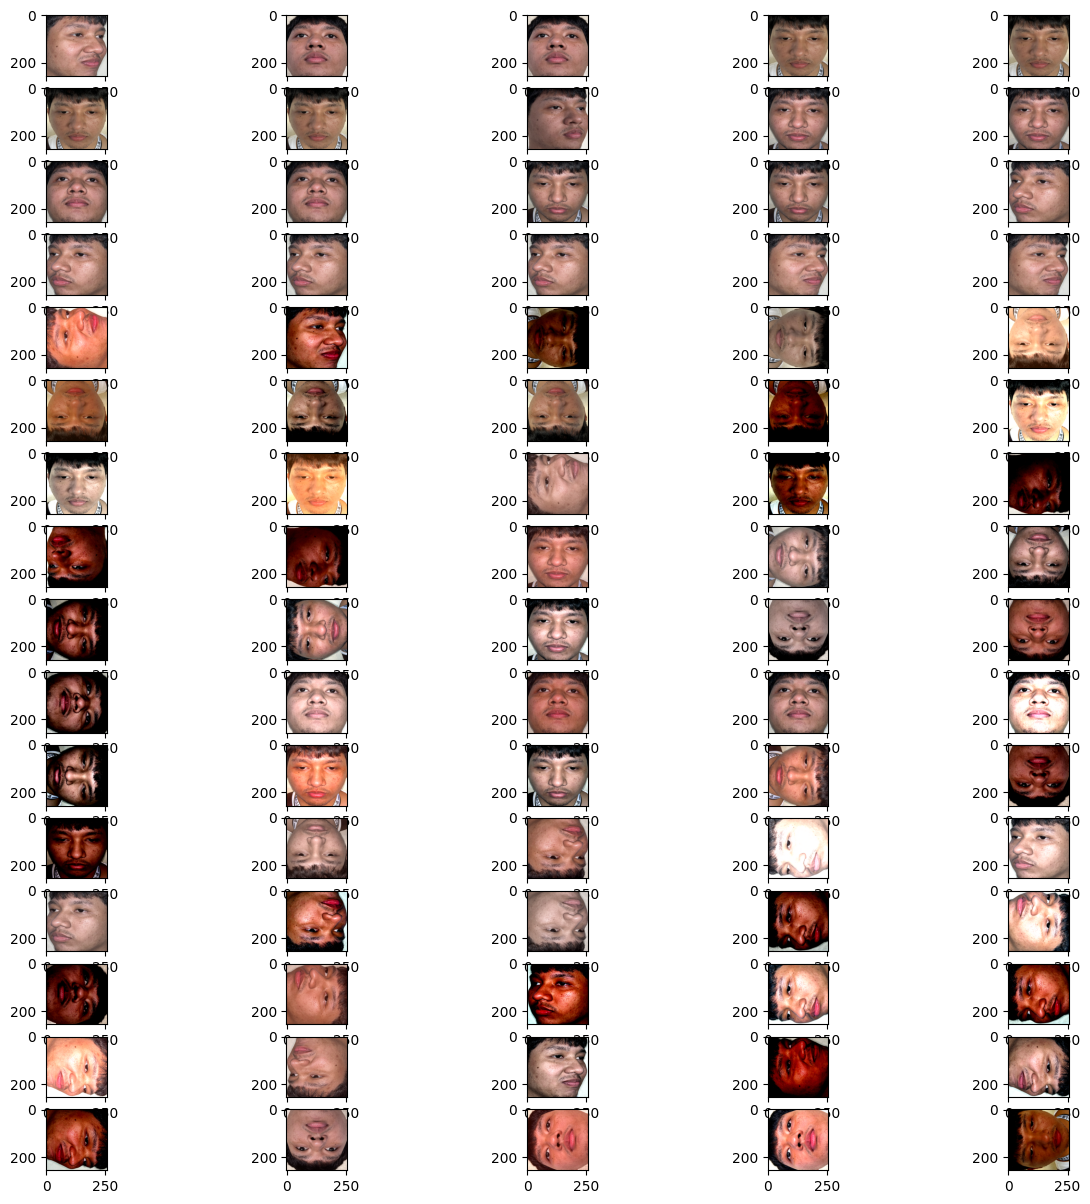

In [5]:
data = np.load("full_dataset_6.npz")

X_rgb, y = data['arr_0'], data['arr_1']

print(X_rgb.shape)

pictures = np.where(data['arr_1'] == "June Batacan")[0]

temp = pictures[0]
fig, axarr = plt.subplots(16,5, figsize=(15,15))
#plt.title("Insert title")
for i in range(16):
    for j in range(5):
        axarr[i,j].imshow(X_rgb[temp])
        temp = temp+1
plt.show()

# Display a specific image (e.g., the image at index 221)
#plt.imshow(X_rgb[0])


# NORMALIZING/SCALING

In [2]:
data = np.load("full_dataset_6.npz")

X_rgb, y = data['arr_0'], data['arr_1']
print(X_rgb[0][0,0])
print(X_rgb[0][0,1])
print(X_rgb[0][1,0])

print(type(X_rgb[0]))
red_min = X_rgb[0][:, :, 0].min()
red_max = X_rgb[0][:, :, 0].max()

blue_min = X_rgb[0][:, :, 1].min()
blue_max = X_rgb[0][:, :, 1].max()

green_min = X_rgb[0][:, :, 2].min()
green_max = X_rgb[0][:, :, 2].max()
#for RED value

norm = []

X_rgb = X_rgb.astype('float64')
print(X_rgb[0].dtype)

for num in range(4000):
    print(num)
    for i in range(256):
        for j in range(256):
            X_rgb[num][i,j,0] = round(((X_rgb[num][i,j,0] - red_min)/(red_max - red_min)), 3)
            X_rgb[num][i,j,1] = round(((X_rgb[num][i,j,1] - blue_min)/(blue_max - blue_min)), 3)
            X_rgb[num][i,j,2] = round(((X_rgb[num][i,j,2] - green_min)/(green_max - green_min)), 3)
        
#print(norm)
#values = np.array(X_rgb[0])
#print(type(values))
#temp = X_rgb[0].tolist() #first image




[238 231 225]
[240 233 227]
[242 235 229]
<class 'numpy.ndarray'>
float64
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258


KeyboardInterrupt: 

In [10]:
print(X_rgb[23][0,0])
np.savez("tempnorm.npz", X_rgb, y)

[0.435 0.492 0.459]


# ONE HOT ENCODING

In [2]:
#TEMPORARY

data = np.load("tempnorm.npz")

X_rgb, y = data['arr_0'], data['arr_1']

label_encoder = LabelEncoder()
y_label = label_encoder.fit_transform(y)

#one hot encoder for the labels

y_oneHot = to_categorical(y_label, num_classes = 50)

X_train, X_test, y_train, y_test = train_test_split(X_rgb, y_oneHot, test_size = 0.2)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(3200, 256, 256, 3) (3200, 50) (800, 256, 256, 3) (800, 50)


# CREATING DEEP NEURAL NETWORK

#### FROM SCRATCH

In [10]:
def compileModel(learning_rate):
    
    neuralmodel = Sequential()

    neuralmodel.add(Conv2D(16, (3,3), activation = 'relu', input_shape = (256, 256, 3)))
    neuralmodel.add(MaxPooling2D(2,2))
    neuralmodel.add(Conv2D(32, (3,3), activation = 'relu'))
    neuralmodel.add(MaxPooling2D(2,2))
    
    neuralmodel.add(Conv2D(64, (3,3), activation = 'relu'))
    neuralmodel.add(MaxPooling2D(2,2))

    neuralmodel.add(Flatten())
    
    
    #neuralmodel.add(Conv2D(128, (3,3), activation = 'relu'))
    #neuralmodel.add(MaxPooling2D(2,2))
    neuralmodel.add(Dropout(0.75))
    

    neuralmodel.add(Dense(1024, activation = 'relu'))
    neuralmodel.add(Dropout(0.75))
    neuralmodel.add(Dense(units = 50, activation = 'softmax'))

    neuralmodel.summary()
    
    optimizer = Adam(learning_rate = learning_rate)
    neuralmodel.compile(optimizer = optimizer,
                        loss = "categorical_crossentropy",
                        metrics = ['accuracy'])

    return neuralmodel

def train_model(model, X_train, y_train, batch_size, epochs, X_test, y_test, early_stopping ,checkpoint):
    
    history = model.fit(
        x = X_train,
        y = y_train,
        epochs = epochs,
        batch_size = batch_size,
        validation_data = (X_test, y_test),
        callbacks = [early_stopping, checkpoint],
    )
    epochs = history.epoch
        
    hist = pd.DataFrame(history.history)
    accuracy = hist["val_loss"]
    
    #plotGraph(epochs,accuracy)
    
    
def plotGraph(epochs, accuracy):
    
    plt.subplot(100)
    plt.plot(epochs, accuracy, label = 'val_accuracy')
    plt.legend()
    
    plt.show()

    

In [11]:
learningRate = 0.0005
epochs = 30
batch_size = 150

cnnModel = compileModel(learningRate)
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 3)
checkpoint = ModelCheckpoint('checkpointFacialRecog.h5', monitor = 'val_acc')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0005)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 30, 30, 64)      

In [29]:
from keras.applications.vgg16 import preprocess_input

X_train = preprocess_input(X_train)
X_test = preprocess_input(X_test)

In [12]:
train_model(cnnModel, X_train, y_train, batch_size, epochs, X_test, y_test, early_stopping, checkpoint)

Epoch 1/30
22/22 [==============================] - 181s 8s/step - loss: 4.0138 - accuracy: 0.0231 - val_loss: 3.8999 - val_accuracy: 0.0325
Epoch 2/30
22/22 [==============================] - 167s 8s/step - loss: 3.8428 - accuracy: 0.0522 - val_loss: 3.7763 - val_accuracy: 0.0838
Epoch 3/30
22/22 [==============================] - 157s 7s/step - loss: 3.5972 - accuracy: 0.1191 - val_loss: 3.3844 - val_accuracy: 0.3300
Epoch 4/30
22/22 [==============================] - 155s 7s/step - loss: 3.0006 - accuracy: 0.2781 - val_loss: 2.6892 - val_accuracy: 0.4600
Epoch 5/30
22/22 [==============================] - 162s 7s/step - loss: 2.2763 - accuracy: 0.4531 - val_loss: 1.8928 - val_accuracy: 0.6037
Epoch 6/30
22/22 [==============================] - 170s 8s/step - loss: 1.6402 - accuracy: 0.5825 - val_loss: 1.4346 - val_accuracy: 0.6862
Epoch 7/30
22/22 [==============================] - 157s 7s/step - loss: 1.1345 - accuracy: 0.7081 - val_loss: 1.1296 - val_accuracy: 0.7563
Epoch 8/30
22

In [11]:
recent_model = tf.keras.models.load_model('checkpointFacialRecog.h5')

loss, acc = recent_model.evaluate(X_test, y_test, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

predictions = recent_model.predict(X_test, batch_size = 100)

from sklearn.metrics import accuracy_score
accuracy_score(y_test.argmax(axis=1), predictions.argmax(axis=1))

In [10]:
from sklearn.metrics import confusion_matrix

predicted_labels = np.argmax(predictions, axis=1)
data_val = np.argmax(y_test, axis=1)

print(predicted_labels[0], data_val[0])

temp_matrix = confusion_matrix(data_val, predicted_labels)

#fig, axarr = plt.subplots(2,2)
#axarr[0,0].imshow(y_train[0])
#plt.show()

NameError: name 'predictions' is not defined

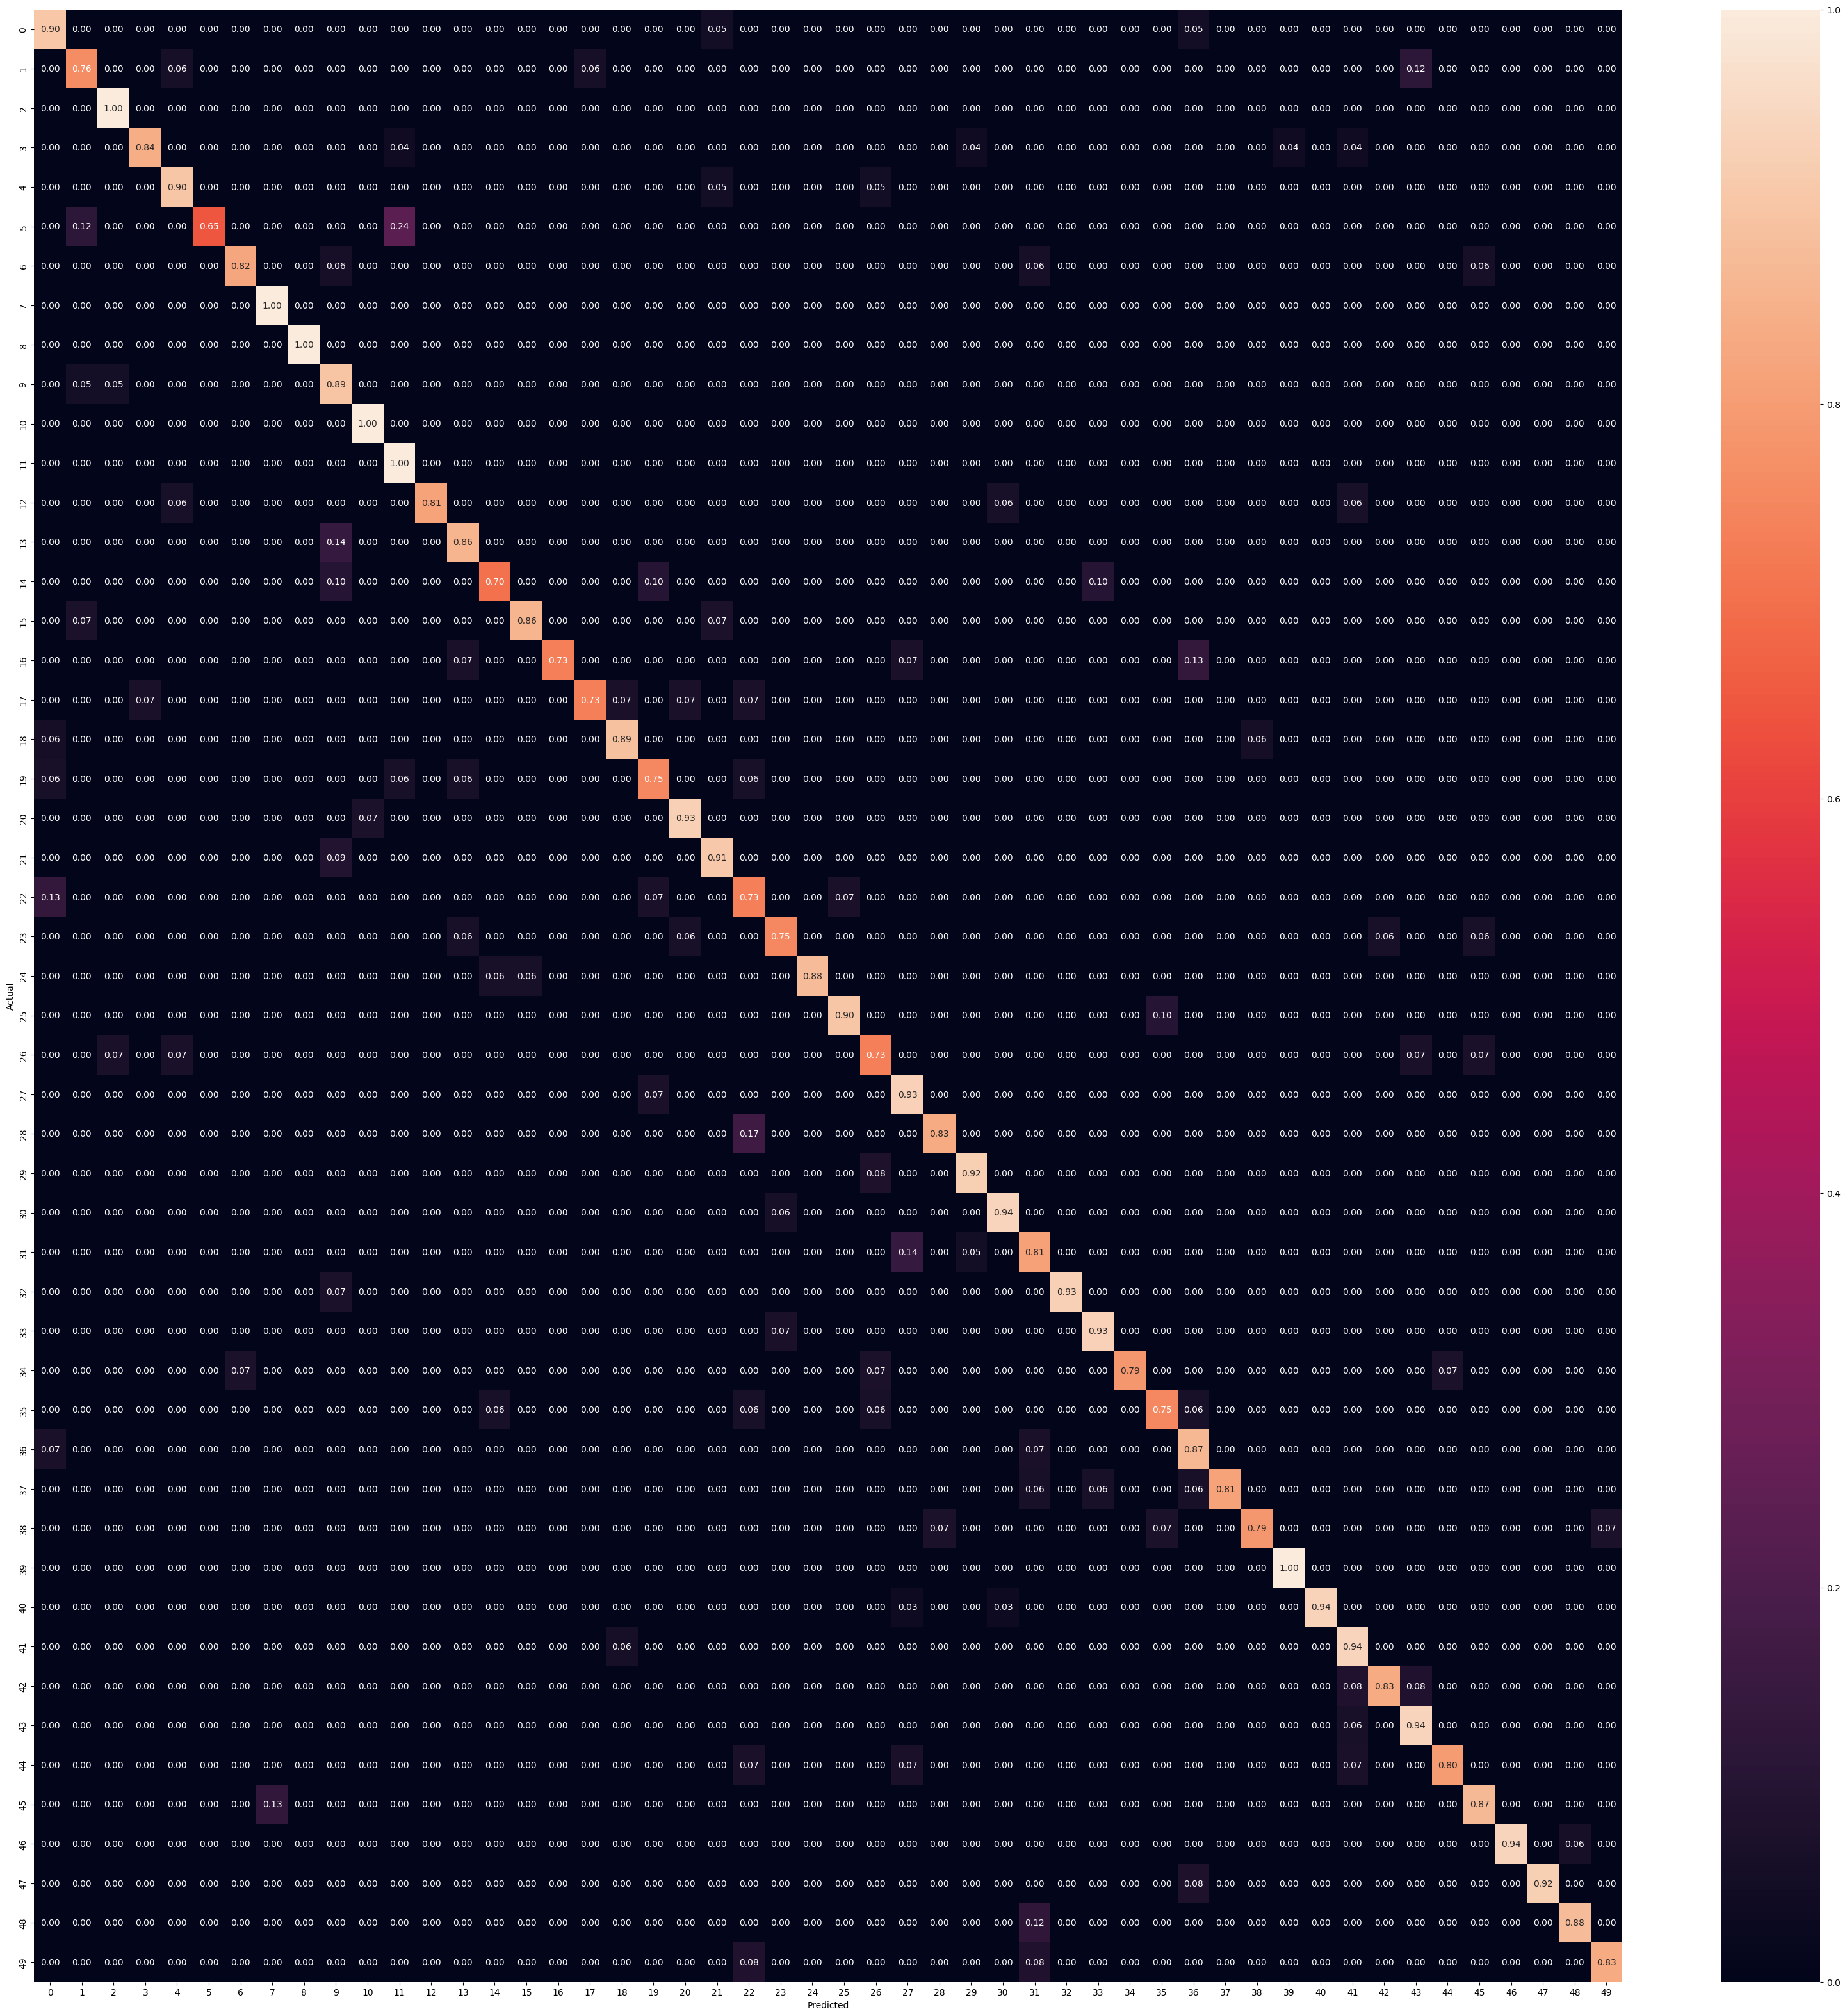

In [11]:
import seaborn as sns

normalizeMat = temp_matrix.astype('float') / temp_matrix.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(40,40))
sns.heatmap(normalizeMat, annot=True, fmt='.2f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [76]:
#temp_matrix

#declaring a 50x4 array


sampleMat = [[0 for _ in range (4)] for  _ in range(50)]

#zero col is TP
#first column is False Negative FN
#second column is False Positive FP
#temp_matrix = [[16,0,0], [0,17,1], [0,0,11]]
temp_matrix = np.array(temp_matrix)
for i in range(50):
    sampleMat[i][0] = temp_matrix[i,i]
    sampleMat[i][1] = temp_matrix[i,:,].sum() - sampleMat[i][0]
    sampleMat[i][2] = temp_matrix[:,i].sum() - sampleMat[i][0]
    sampleMat[i][3] = temp_matrix.sum() - (sampleMat[i][0] + sampleMat[i][1] + sampleMat[i][2])
    
print(sampleMat)

[[29, 1, 1, 769], [12, 0, 0, 788], [12, 0, 0, 788], [15, 1, 0, 784], [19, 0, 0, 781], [19, 1, 3, 777], [15, 0, 0, 785], [14, 0, 0, 786], [16, 0, 1, 783], [15, 0, 0, 785], [15, 0, 0, 785], [13, 0, 0, 787], [25, 0, 0, 775], [16, 0, 1, 783], [17, 1, 3, 779], [14, 1, 1, 784], [19, 1, 1, 779], [14, 0, 0, 786], [11, 0, 0, 789], [20, 1, 0, 779], [10, 4, 0, 786], [17, 1, 0, 782], [10, 0, 2, 788], [17, 0, 0, 783], [23, 1, 0, 776], [11, 0, 0, 789], [13, 1, 0, 786], [15, 0, 0, 785], [15, 1, 0, 784], [20, 0, 0, 780], [22, 0, 1, 777], [10, 0, 0, 790], [10, 0, 0, 790], [9, 1, 0, 790], [15, 1, 0, 784], [14, 0, 0, 786], [16, 0, 2, 782], [13, 0, 0, 787], [12, 0, 1, 787], [18, 0, 0, 782], [19, 0, 0, 781], [12, 3, 0, 785], [19, 2, 1, 778], [17, 0, 2, 781], [9, 0, 1, 790], [20, 0, 0, 780], [15, 0, 0, 785], [10, 0, 0, 790], [21, 0, 0, 779], [16, 0, 1, 783]]


In [12]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score

acc = metrics.accuracy_score(y_test.argmax(axis=1), predictions.argmax(axis=1))
precisionMac = metrics.precision_score(y_test.argmax(axis=1), predictions.argmax(axis=1), average = 'macro')
precisionMic = metrics.precision_score(y_test.argmax(axis=1), predictions.argmax(axis=1), average = 'micro')
recallMac = metrics.recall_score(y_test.argmax(axis=1), predictions.argmax(axis=1), average = 'macro')
recallMic = metrics.recall_score(y_test.argmax(axis=1), predictions.argmax(axis=1), average = 'micro')
f1scoreMac = metrics.f1_score(y_test.argmax(axis=1), predictions.argmax(axis=1), average = 'macro')
f1scoreMic = metrics.f1_score(y_test.argmax(axis=1), predictions.argmax(axis=1), average = 'micro')
print(f'This is accuracy: {acc}')
print(f'This is macro averaged precision: {precisionMac}')
print(f'This is micro averaged precision: {precisionMic}')
print(f'This is macro averaged recall: {recallMac}')
print(f'This is micro averaged recall: {recallMic}')
print(f'This is macro averaged F1 score: {f1scoreMac}')
print(f'This is micro averaged F1 score: {f1scoreMic}')



This is accuracy: 0.865
This is macro averaged precision: 0.87451867391967
This is micro averaged precision: 0.865
This is macro averaged recall: 0.8625810525563848
This is micro averaged recall: 0.865
This is macro averaged F1 score: 0.8634761787562134
This is micro averaged F1 score: 0.865
